In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.simplefilter('ignore')

In [2]:
data = pd.read_csv("drugss.csv")

In [3]:
data.keys()

Index(['uniqueID', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')

In [4]:
data.sample()

,uniqueID,drugName,condition,review,rating,date,usefulCount
9271,113877,Tegretol,Epilepsy,"""Have been taking for 13 years. Have been seiz...",9,13-Feb-13,45


In [5]:
data.shape

(11332, 7)

data = data.drop(['date','uniqueID','review'], axis = 1)

In [6]:
from sklearn.preprocessing import LabelEncoder
d_types = dict(data.dtypes)

for name, type_ in d_types.items():
    if str(type_) == 'object':
        Le = LabelEncoder()
        data[name] = Le.fit_transform(data[name])

In [7]:
from sklearn.preprocessing import OneHotEncoder

onehotencoder = OneHotEncoder()
encodings = onehotencoder.fit_transform(data['condition'].values.reshape(-1,1)).toarray()

values = data['condition'].unique()

for val in values:
    data['condition_' + str(val)] = encodings[:,val]
    
data = data.drop(['condition'], axis = 1)
data.head()

,uniqueID,drugName,review,rating,date,usefulCount,condition_150,condition_36,condition_7,condition_373,...,condition_327,condition_47,condition_165,condition_390,condition_225,condition_267,condition_58,condition_177,condition_270,condition_168
0,70731,0,7368,10,218,76,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,94806,1,6287,10,2709,141,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,94980,1,5963,8,1861,105,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,94955,1,112,10,2895,103,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,94764,1,241,5,947,103,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
remaining_columns = list(data.columns)
remaining_columns.remove("drugName")

In [9]:
X = data[remaining_columns].values
Y = data['drugName']

In [10]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.4, random_state = 4)

In [11]:
from sklearn.preprocessing import StandardScaler

Scaler = StandardScaler()
Xtrain = Scaler.fit_transform(Xtrain)
Xtest = Scaler.transform(Xtest)

In [12]:
print(Xtrain.shape)
print(Xtest.shape)
print(Ytrain.shape)
print(Ytest.shape)

(6799, 422)
(4533, 422)
(6799,)
(4533,)


In [13]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier() 
clf.fit(Xtrain, Ytrain)
Y_pred = clf.predict(Xtest)

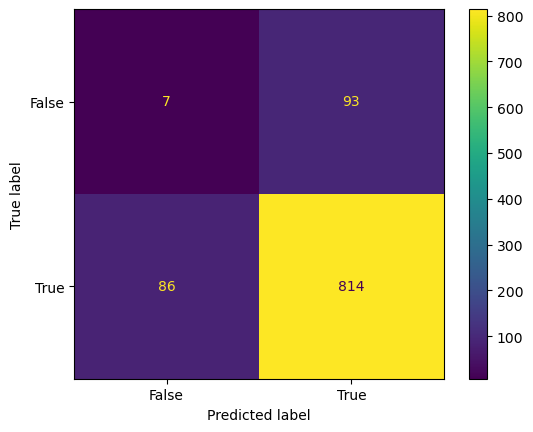

In [14]:
import numpy
from sklearn import metrics

actual = numpy.random.binomial(1,.9,size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()
#True Negative (Top-Left Quadrant) 8 correct
#False Positive (Top-Right Quadrant) Identify as true but when compared 91 are false 
#False Negative (Bottom-Left Quadrant) 94 are false prediction
#True Positive (Bottom-Right Quadrant) 807 are true

In [15]:
print(accuracy_score(Y_pred,Ytest))

0.6410765497463049


In [17]:
print(classification_report(actual, predicted))

              precision    recall  f1-score   support

           0       0.08      0.07      0.07       100
           1       0.90      0.90      0.90       900

    accuracy                           0.82      1000
   macro avg       0.49      0.49      0.49      1000
weighted avg       0.82      0.82      0.82      1000



In [ ]:
from sklearn.ensemble import BaggingClassifier
bag_model = BaggingClassifier(base_estimator = RandomForestClassifier(),
                 n_estimators = 100,
                 max_samples = 0.8,
                 oob_score = True,
                 random_state = 0
)

bag_model.fit(Xtrain, Ytrain)
bag_model.oob_score_

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
bag_model = BaggingClassifier(base_estimator = RandomForestClassifier(),
                 n_estimators = 100,
                 max_samples = 0.8,
                 oob_score = True,
                 random_state = 0
)

scores = cross_val_score(bag_model, X, Y, cv=5)
scores.mean()

In [16]:
print(classification_report(Y_pred,Ytest))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.27      0.30      0.29        10
           2       0.00      0.00      0.00         1
           3       0.50      1.00      0.67         1
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       1.00      0.76      0.87        17
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         2
          13       1.00      0.50      0.67         2
          14       1.00      1.00      1.00         1
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         0
          18       0.00      0.00      0.00         0
          19       0.83    

In [ ]:
value_counts = dict(data['drugName'].value_counts())
print(value_counts)

In [ ]:
for key, value in value_counts.items():
    value_counts[key] = value/len(data)
    
print(value_counts)

In [ ]:
class_weights = {}
for key, value in value_counts.items():
    class_weights[key] = sum(value_counts.values()) - value / sum(value_counts.values())
    
class_weights

In [ ]:
model = DecisionTreeClassifier(max_depth = 5, class_weight = class_weights)
model.fit(Xtrain, Ytrain)